# **# Welcome to 21f3000618's MLP Project**

# **Step 1: Import all necessary libraries**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier


# **Step 2: Load the Data**

In [3]:
# Load Recipe data
train_df = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')
test_df = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')

# **Step 3: Initial Exploration**

In [4]:
# Initial Exploration
print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)
print("\nTrain Data Info:")
print(train_df.info())
print("\nTest Data Info:")
print(test_df.info())
print("\nTrain Data Description:")
print(train_df.describe())


Train Data Shape: (13636, 15)
Test Data Shape: (4546, 14)

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10

# **Step 4: Perform Exploratory Data Analytics**

**Initial Analytics**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


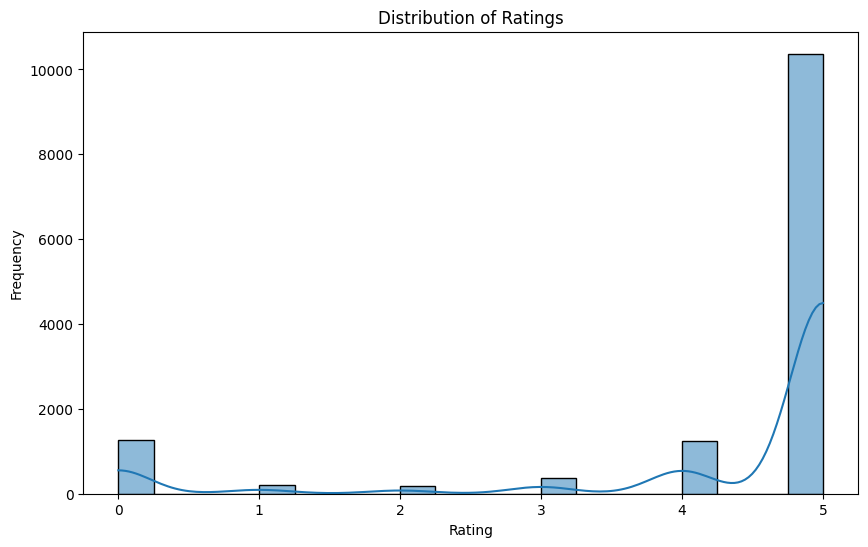

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


**Distribution of Thumbs up count**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


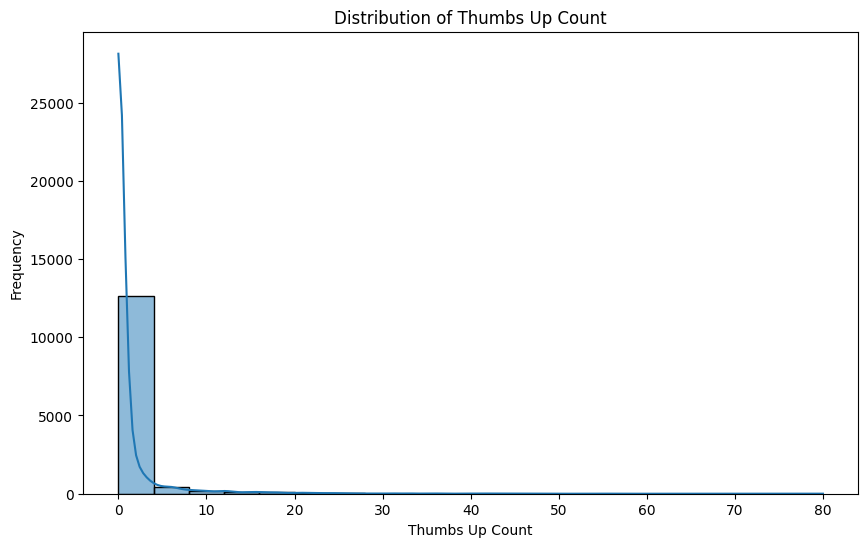

In [6]:
# Distribution of Thumbs Up Count
plt.figure(figsize=(10, 6))
sns.histplot(train_df['ThumbsUpCount'], bins=20, kde=True)
plt.title('Distribution of Thumbs Up Count')
plt.xlabel('Thumbs Up Count')
plt.ylabel('Frequency')
plt.show()


The graph illustrates the distribution of the number of thumbs up (up-votes) received by comments on recipes. The x-axis represents the thumbs up count, while the y-axis represents the frequency of occurrences. The histogram provides insights into the engagement level of users, indicating how many comments received a particular number of thumbs up. The presence of the kernel density estimation (KDE) curve offers a smoothed representation of the distribution. This visualization aids in understanding the popularity and reception of comments among users, which can influence recipe ratings and overall user satisfaction with the platform.

**Average rating by reply count**

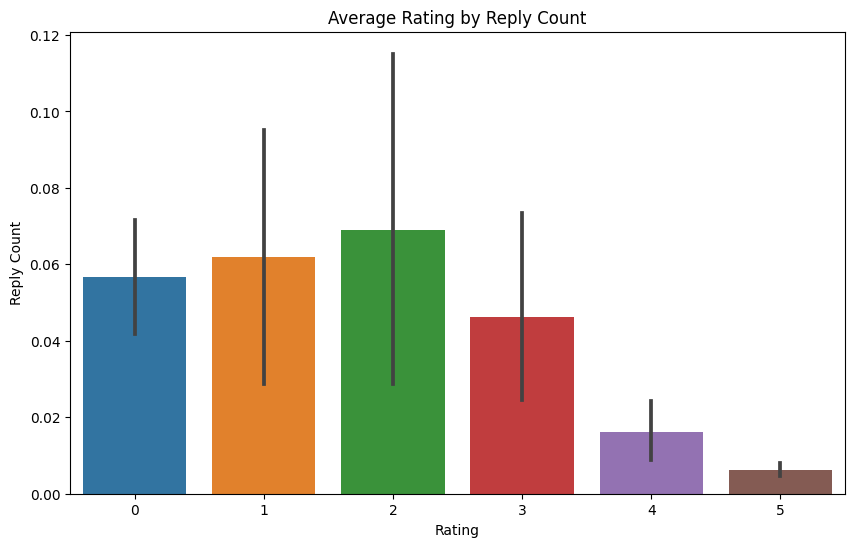

In [7]:
# Average Rating by Reply Count
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='ReplyCount', data=train_df)
plt.title('Average Rating by Reply Count')
plt.xlabel('Rating')
plt.ylabel('Reply Count')
plt.show()


The bar plot illustrates the average rating of recipes based on different levels of reply count, where the x-axis represents the rating and the y-axis represents the reply count. Each bar represents the average rating for recipes that received a specific number of replies. This visualization helps in exploring the relationship between user engagement, indicated by the reply count, and the perceived quality of recipes, represented by the average rating. It offers insights into whether recipes with higher engagement (more replies) tend to have higher or lower average ratings, providing valuable information about user interactions and their influence on recipe ratings.

**Average Rating by Thumbs up**

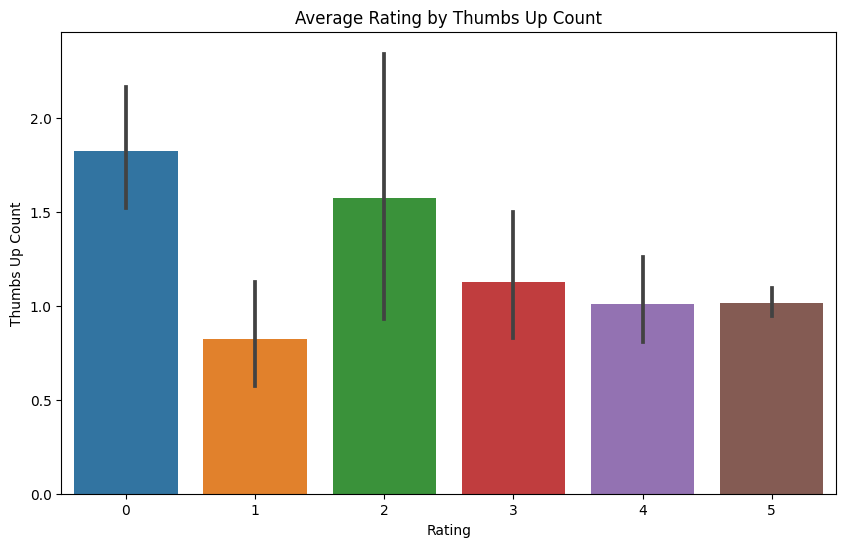

In [8]:
# Average Rating by Thumbs Up Count
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='ThumbsUpCount', data=train_df)
plt.title('Average Rating by Thumbs Up Count')
plt.xlabel('Rating')
plt.ylabel('Thumbs Up Count')
plt.show()


The bar plot displays the average rating of recipes categorized by different levels of thumbs up count. The x-axis represents the rating scores, while the y-axis represents the thumbs up count. Each bar represents the average rating for recipes that received a specific number of thumbs up. This visualization aims to explore the relationship between positive user feedback, as indicated by the thumbs up count, and the perceived quality of recipes, represented by the average rating. It provides insights into whether recipes with higher levels of positive user feedback tend to have higher or lower average ratings, offering valuable information about the influence of user engagement on recipe ratings.

# **Step 5: Key Statistics**

**Key Statistics**

In [9]:
# Key Statistics
print("Mean Rating:", train_df['Rating'].mean())
print("Median Rating:", train_df['Rating'].median())
print("Max ThumbsUpCount:", train_df['ThumbsUpCount'].max())
print("Min ThumbsUpCount:", train_df['ThumbsUpCount'].min())
print("Max ThumbsDownCount:", train_df['ThumbsDownCount'].max())
print("Min ThumbsDownCount:", train_df['ThumbsDownCount'].min())

Mean Rating: 4.2887210325608685
Median Rating: 5.0
Max ThumbsUpCount: 80
Min ThumbsUpCount: 0
Max ThumbsDownCount: 126
Min ThumbsDownCount: 0


Mean Rating: This statistic represents the average rating given by users to recipes. It gives an overall idea of the perceived quality of recipes in the dataset.

Median Rating: The median rating represents the middle value of all ratings when they are sorted in ascending order. It is less affected by extreme values and provides a measure of central tendency that can be more robust than the mean.

Max ThumbsUpCount: This statistic indicates the highest number of thumbs up (up-votes) received by comments on recipes. It reflects the maximum level of positive engagement or approval from users for comments related to recipes.

Min ThumbsUpCount: Conversely, this statistic represents the lowest number of thumbs up received by comments on recipes. It reflects the minimum level of positive engagement or approval from users for comments related to recipes.

Max ThumbsDownCount: Similar to max thumbs up count, this statistic indicates the highest number of thumbs down (down-votes) received by comments on recipes. It reflects the maximum level of negative feedback or disapproval from users for comments related to recipes.

Min ThumbsDownCount: Conversely, this statistic represents the lowest number of thumbs down received by comments on recipes. It reflects the minimum level of negative feedback or disapproval from users for comments related to recipes.

These statistics offer valuable insights into the distribution, central tendency, and extremities of ratings and user feedback in the dataset, providing context for further analysis and modeling.

**Column Analysis**

In [10]:
# Uniqueness Analysis
unique_counts = train_df.nunique()
print("Unique Value Counts:")
print(unique_counts)

Unique Value Counts:
ID                     701
RecipeNumber           100
RecipeCode             100
RecipeName             100
CommentID            13636
UserID               10783
UserName             10620
UserReputation          20
CreationTimestamp     2422
ReplyCount               4
ThumbsUpCount           57
ThumbsDownCount         51
Rating                   6
BestScore              525
Recipe_Review        13370
dtype: int64


# **Step 6: Key Relationships**

**Correlation Analysis**

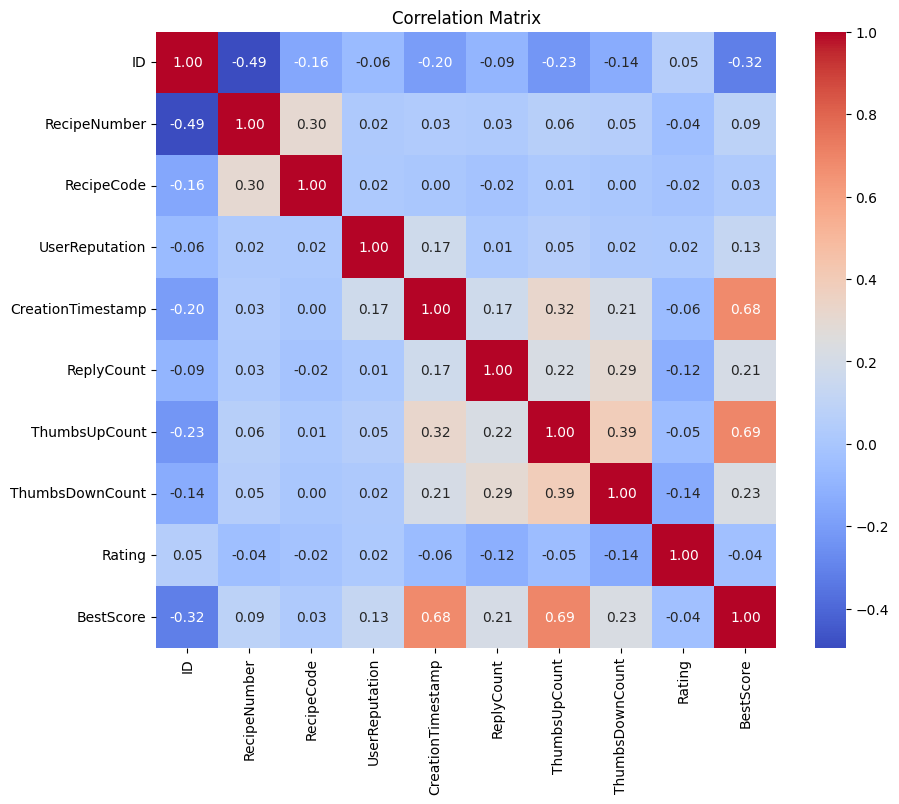

In [11]:
# Correlation Analysis
numeric_columns = train_df.select_dtypes(include=['number']).columns
correlation_matrix = train_df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

This visualization provides insights into the relationships between numeric variables in the dataset. Positive correlations (values close to 1) indicate that as one variable increases, the other tends to increase as well, while negative correlations (values close to -1) indicate that as one variable increases, the other tends to decrease. A correlation value close to 0 suggests little to no linear relationship between the variables. This analysis helps in identifying potential patterns, redundancies, or dependencies among variables, which is valuable for feature selection, model building, and understanding the dataset's structure.

**Distribution of Ratings and Best Scores**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


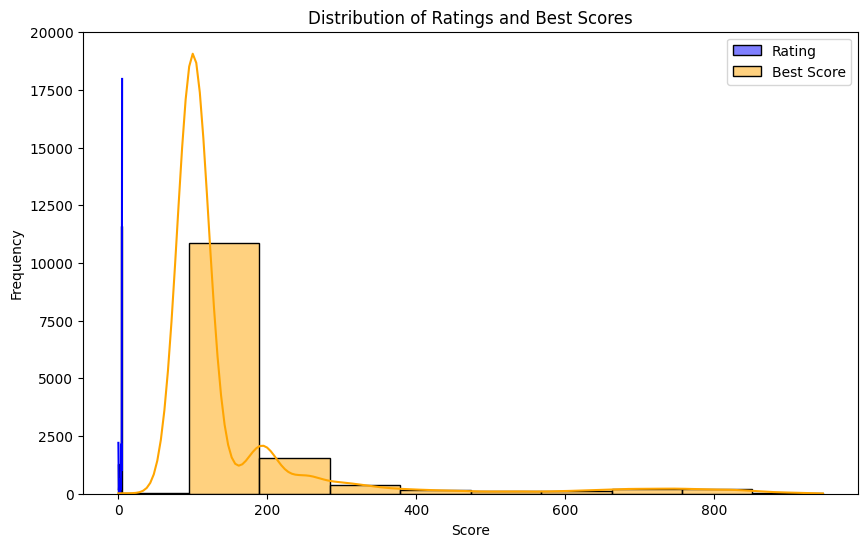

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Rating'], bins=5, kde=True, color='blue', label='Rating')
sns.histplot(train_df['BestScore'], bins=10, kde=True, color='orange', label='Best Score')
plt.title('Distribution of Ratings and Best Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


The graph displays histograms for the distribution of ratings and best scores in the dataset. Ratings are represented by blue bars, while best scores are represented by orange bars. Both histograms include kernel density estimation (KDE) curves to provide a smoothed representation of the distributions. The visualization allows for comparison between the distributions of ratings and best scores, providing insights into their respective frequency distributions and potential relationships.

**Relationship between Thumbs Ups and Thumbs Down!**

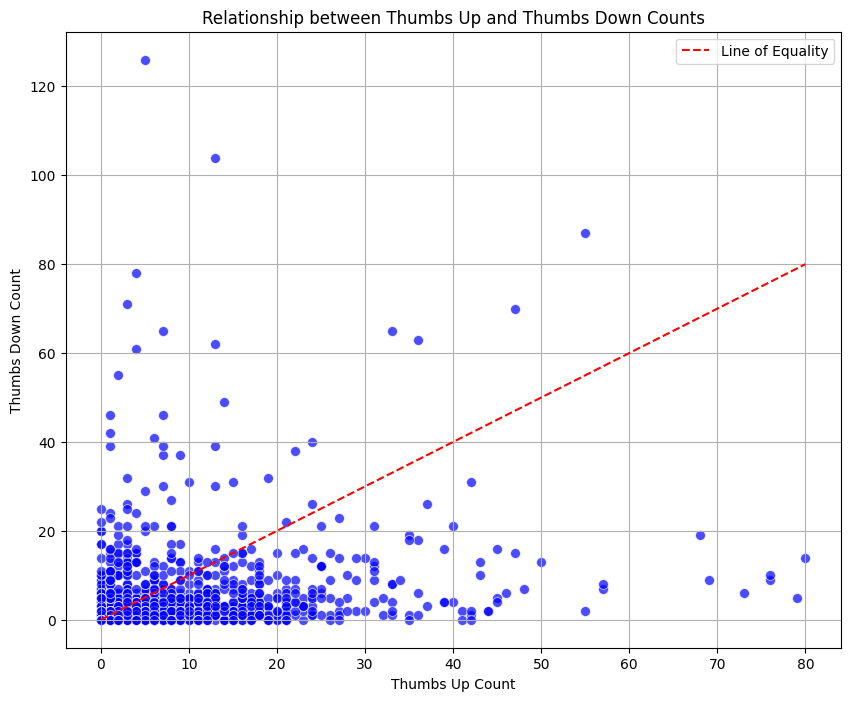

In [16]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=train_df, x='ThumbsUpCount', y='ThumbsDownCount', color='blue', s=50, alpha=0.7)
plt.plot([0, train_df['ThumbsUpCount'].max()], [0, train_df['ThumbsUpCount'].max()], color='red', linestyle='--', label='Line of Equality')
plt.title('Relationship between Thumbs Up and Thumbs Down Counts')
plt.xlabel('Thumbs Up Count')
plt.ylabel('Thumbs Down Count')
plt.legend()
plt.grid(True)
plt.show()


This visualization allows for the exploration of the relationship between user engagement (thumbs up counts) and user dissatisfaction or disagreement (thumbs down counts) with comments. It helps in understanding whether there's any correlation or pattern between these two types of user interactions. The title 'Relationship between Thumbs Up and Thumbs Down Counts' summarizes the focus of the visualization, and the x and y-axis labels provide context for interpreting the plot.

**Dropping Unnecessary Columns**

In [11]:
# Drop unnecessary columns
drop_columns = ['RecipeCode', 'RecipeName', 'CommentID', 'UserID', 'UserName']
train_df.drop(columns=drop_columns, inplace=True)
test_df.drop(columns=drop_columns, inplace=True)

# **Step 7: Null Values**

**Detecting Missing Values**

In [15]:
# Check for missing data in train_df
missing_train = train_df.isnull().sum()
missing_train_placeholder = (train_df.isin(['', 'NA', 'NaN']).sum())
print("Missing data in train_df:")
print(missing_train + missing_train_placeholder)

# Check for missing data in test_df
missing_test = test_df.isnull().sum()
missing_test_placeholder = (test_df.isin(['', 'NA', 'NaN']).sum())
print("\nMissing data in test_df:")
print(missing_test + missing_test_placeholder)


Missing data in train_df:
ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64

Missing data in test_df:
ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64


**Imputing missing values**

In [13]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
train_df['ThumbsUpCount'] = imputer.fit_transform(train_df[['ThumbsUpCount']])
test_df['ThumbsUpCount'] = imputer.transform(test_df[['ThumbsUpCount']])

# **Step 8[A]: Pre Processing**

**Identifying Numerical Features**

In [14]:
numerical_features = train_df.select_dtypes(include=['number']).columns.tolist()
numerical_features.remove('Rating')  # Remove Rating column
print(numerical_features)

['ID', 'RecipeNumber', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']


**Scaling Numerical Features using Standard Scaler**

In [15]:
# Initialize StandardScaler
scaler = StandardScaler()
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

**Scaling Numerical Features using MinMax Scaler**

In [168]:
# Initialize StandardScaler
scaler = MinMaxScaler()

# Scale numerical features in the training set
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])

# Scale numerical features in the test set
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

**Identification of Categorical featues**

In [16]:
# Identify categorical features
categorical_features = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical Features:")
print(categorical_features)


Categorical Features:
['Recipe_Review']


# **Step 8[B]: Feature Engineering**

**TDIDF Vectorization**

In [17]:
# Encode and vectorize text feature
tfidf_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
tfidf_features_train = tfidf_vectorizer.fit_transform(train_df['Recipe_Review'].fillna(''))
tfidf_features_test = tfidf_vectorizer.transform(test_df['Recipe_Review'].fillna(''))

**One Hot Encoding**

In [18]:
# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_features_train = encoder.fit_transform(train_df[categorical_features].fillna('UNKNOWN'))
encoded_features_test = encoder.transform(test_df[categorical_features].fillna('UNKNOWN'))

**Demonstration of how Sparse Stack Works**
This is just a demo and not a part of the model

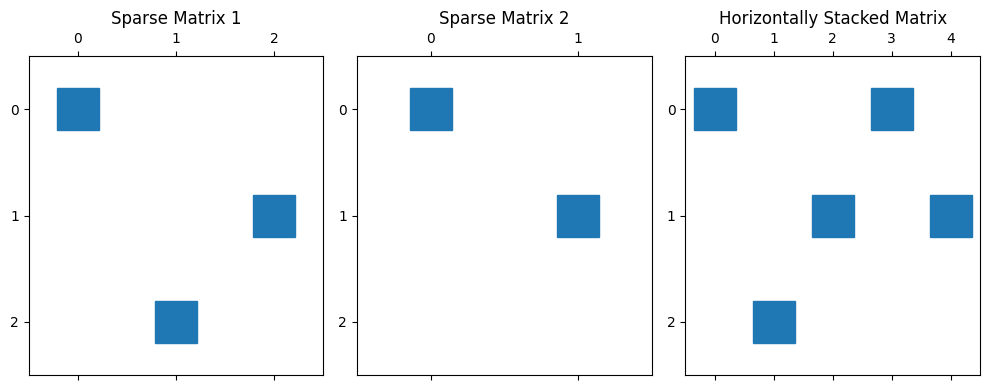

In [17]:
import numpy as np
from scipy.sparse import csr_matrix, hstack
import matplotlib.pyplot as plt

# Create two sparse matrices
sparse_matrix1 = csr_matrix([[1, 0, 0],
                             [0, 0, 2],
                             [0, 3, 0]])

sparse_matrix2 = csr_matrix([[4, 0],
                             [0, 5],
                             [0, 0]])

# Horizontally stack the sparse matrices
stacked_matrix = hstack([sparse_matrix1, sparse_matrix2])

# Plotting the matrices
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.spy(sparse_matrix1, markersize=30, aspect='auto')
plt.title('Sparse Matrix 1')

plt.subplot(1, 3, 2)
plt.spy(sparse_matrix2, markersize=30, aspect='auto')
plt.title('Sparse Matrix 2')

plt.subplot(1, 3, 3)
plt.spy(stacked_matrix, markersize=30, aspect='auto')
plt.title('Horizontally Stacked Matrix')

plt.tight_layout()
plt.show()


**Concatination of Encoded and Vectorised Features**

In [19]:
# Concatenate encoded and TF-IDF features
X_train = sparse.hstack([encoded_features_train, tfidf_features_train])
X_test = sparse.hstack([encoded_features_test, tfidf_features_test])

# **Step 9: Initialise Essential Pipelines**

In [192]:
# Define numerical and categorical features
numerical_features = ['ThumbsUpCount']  # Update with your numerical features
categorical_features = ['Recipe_Review']

# Define preprocessing steps for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Define preprocessing steps for text features
text_transformer = Pipeline(steps=[
    ('tfidf_vectorizer', TfidfVectorizer(lowercase=True, stop_words='english'))
])

# Define preprocessing steps for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot_encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('text', text_transformer, 'Recipe_Review'),
        ('cat', categorical_transformer, categorical_features)
    ]
)


**Defining Target Variable**

In [20]:
# In our case, our target variable is Rating
y_train = train_df['Rating']

# **Step 10: Hyperparameter Tuning**

**Hyperparameter Tuning: Logistic Regression**

In [195]:
# Split the data into train and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define hyperparameters for logistic regression
param_distribution = {
    'penalty': ['l1', 'l2'],
    'C': uniform(0.1, 10)  # Continuous uniform distribution for C
}

# Initialize logistic regression model
logistic_regression = LogisticRegression(max_iter=1000)

# Perform RandomizedSearchCV
randomized_search = RandomizedSearchCV(logistic_regression, param_distribution, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train_split, y_train_split)

# Print best hyperparameters
print("Best Hyperparameters for Logistic Regression:", randomized_search.best_params_)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best Hyperparameters for Logistic Regression: {'C': 8.424426408004217, 'penalty': 'l2'}


**Hyperparameter Tuning: Random Forest**

In [21]:
# Split the data into train and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Define hyperparameters for Random Forest
param_distribution_rf = {
    'n_estimators': randint(50, 200),  # Number of trees in the forest
    'max_depth': [10, 20, 30, 40, 50, None],  # Maximum depth of the trees
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10),  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Initialize Random Forest model
random_forest_classifier = RandomForestClassifier()

# Perform RandomizedSearchCV
randomized_search_rf = RandomizedSearchCV(random_forest_classifier, param_distribution_rf, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search_rf.fit(X_train_split, y_train_split)

# Print best hyperparameters
print("Best Hyperparameters for Random Forest:", randomized_search_rf.best_params_)


Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 153}


**Hyperparameter Tuning: Support Vector Machine**

In [ ]:
# Split the data into train and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define hyperparameters for SVM
param_distribution_svm = {
    'C': uniform(0.1, 10),  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Initialize SVM model
svm_classifier = SVC()

# Perform RandomizedSearchCV
randomized_search_svm = RandomizedSearchCV(svm_classifier, param_distribution_svm, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search_svm.fit(X_train_split, y_train_split)

# Print best hyperparameters
print("Best Hyperparameters for SVM:", randomized_search_svm.best_params_)


**Hyperparameter Tuning: Decision Tree**

In [ ]:
# Define hyperparameters for Decision Tree
param_distribution_dt = {
    'max_depth': [10, 20, 30, 40, 50, None],  # Maximum depth of the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10),  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None]  # Number of features to consider at each split
}

# Initialize Decision Tree model
decision_tree_classifier = DecisionTreeClassifier()

# Perform RandomizedSearchCV
randomized_search_dt = RandomizedSearchCV(decision_tree_classifier, param_distribution_dt, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search_dt.fit(X_train_split, y_train_split)

# Print best hyperparameters
print("Best Hyperparameters for Decision Tree:", randomized_search_dt.best_params_)


**Hyperparameter Tuning: KNeighborsClassifier**

In [ ]:

# Define hyperparameters for KNN
param_distribution_knn = {
    'n_neighbors': randint(1, 50),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'p': [1, 2]  # Power parameter for the Minkowski metric
}

# Initialize KNN model
knn_classifier = KNeighborsClassifier()

# Perform RandomizedSearchCV
randomized_search_knn = RandomizedSearchCV(knn_classifier, param_distribution_knn, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search_knn.fit(X_train_split, y_train_split)

# Print best hyperparameters
print("Best Hyperparameters for KNN:", randomized_search_knn.best_params_)


# **Step 11: Model Training**

**Model Training: Logistic Regression**


In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import time

# Train Logistic Regression model
start_time = time.time()
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_split, y_train_split)
training_time = time.time() - start_time

# Make predictions on the test set
test_preds = logistic_regression.predict(X_test_split)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_split, test_preds)
f1 = f1_score(y_test_split, test_preds, average='weighted')
precision = precision_score(y_test_split, test_preds, average='weighted')
recall = recall_score(y_test_split, test_preds, average='weighted')
roc_auc = roc_auc_score(y_test_split, logistic_regression.predict_proba(X_test_split), multi_class='ovr')

# Print evaluation metrics
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)
print("Training Time:", training_time, "seconds")


Logistic Regression Metrics:
Accuracy: 0.7620967741935484
F1 Score: 0.6741324766153269
Precision: 0.6848055002045915
Recall: 0.7620967741935484
ROC AUC: 0.833943108902572
Training Time: 10.588086366653442 seconds


Accuracy = TP+TN/(TP+TN+FP+FN)
F1 Score = 2* precesion * recall / (precesion+recall)
Precision = TP / FP+TP
Recall = TP / TP + FN

**Model Training:Random Forest**

In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import time

# Train Random Forest model
start_time = time.time()
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train_split, y_train_split)
training_time = time.time() - start_time

# Make predictions on the test set
test_preds = random_forest_classifier.predict(X_test_split)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_split, test_preds)
f1 = f1_score(y_test_split, test_preds, average='weighted')
precision = precision_score(y_test_split, test_preds, average='weighted')
recall = recall_score(y_test_split, test_preds, average='weighted')
roc_auc = roc_auc_score(y_test_split, random_forest_classifier.predict_proba(X_test_split), multi_class='ovr')

# Print evaluation metrics
print("Random Forest Metrics:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)
print("Training Time:", training_time, "seconds")


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Metrics:
Accuracy: 0.7620967741935484
F1 Score: 0.6705895690854625
Precision: 0.7223934649340124
Recall: 0.7620967741935484
ROC AUC: 0.7720408055875202
Training Time: 45.09329676628113 seconds


**Model Training: Support Vector Machine**

In [180]:
from sklearn.svm import SVC
import time

# Train SVM model
start_time = time.time()
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train_split, y_train_split)
training_time = time.time() - start_time

# Make predictions on the test set
test_preds = svm_classifier.predict(X_test_split)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_split, test_preds)
f1 = f1_score(y_test_split, test_preds, average='weighted')
precision = precision_score(y_test_split, test_preds, average='weighted')
recall = recall_score(y_test_split, test_preds, average='weighted')
roc_auc = roc_auc_score(y_test_split, svm_classifier.predict_proba(X_test_split), multi_class='ovr')

# Print evaluation metrics
print("SVM Metrics:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)
print("Training Time:", training_time, "seconds")


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM Metrics:
Accuracy: 0.7584310850439883
F1 Score: 0.6571387636481542
Precision: 0.7733365587804036
Recall: 0.7584310850439883
ROC AUC: 0.8322833044509825
Training Time: 318.038583278656 seconds


**Model Training: Decision Tree Classifier**

In [208]:
from sklearn.tree import DecisionTreeClassifier
import time

# Train Decision Tree model
start_time = time.time()
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_split, y_train_split)
training_time = time.time() - start_time

# Make predictions on the test set
test_preds = decision_tree_classifier.predict(X_test_split)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_split, test_preds)
f1 = f1_score(y_test_split, test_preds, average='weighted')
precision = precision_score(y_test_split, test_preds, average='weighted')
recall = recall_score(y_test_split, test_preds, average='weighted')

# Print evaluation metrics
print("Decision Tree Metrics:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Training Time:", training_time, "seconds")


Decision Tree Metrics:
Accuracy: 0.6979472140762464
F1 Score: 0.6779930319077616
Precision: 0.6617489582693731
Recall: 0.6979472140762464
Training Time: 4.824839353561401 seconds


**Model Training: KNeighbours**

In [209]:
from sklearn.neighbors import KNeighborsClassifier
import time

# Train KNN model
start_time = time.time()
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_split, y_train_split)
training_time = time.time() - start_time

# Make predictions on the test set
test_preds = knn_classifier.predict(X_test_split)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_split, test_preds)
f1 = f1_score(y_test_split, test_preds, average='weighted')
precision = precision_score(y_test_split, test_preds, average='weighted')
recall = recall_score(y_test_split, test_preds, average='weighted')

# Print evaluation metrics
print("KNN Metrics:")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Training Time:", training_time, "seconds")


KNN Metrics:
Accuracy: 0.7536656891495601
F1 Score: 0.6571403535757718
Precision: 0.647432235946664
Recall: 0.7536656891495601
Training Time: 0.005396842956542969 seconds


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Step 12: Model Comparison**

In [211]:
from tabulate import tabulate

# Define the data
data = [
    ["Accuracy", 0.762, 0.762, 0.758, 0.754, 0.698],
    ["F1 Score", 0.674, 0.671, 0.657, 0.657, 0.678],
    ["Precision", 0.685, 0.722, 0.773, 0.647, 0.662],
    ["Recall", 0.762, 0.762, 0.758, 0.754, 0.698],
    ["ROC AUC", 0.834, 0.772, 0.832, "N/A", "N/A"],
    ["Training Time (s)", 10.588, 45.093, 318.039, 0.005, 4.825]
]

headers = ["Metric", "Logistic Regression", "Random Forest", "SVM", "KNN", "Decision Tree"]

# Print the table
print(tabulate(data, headers=headers, tablefmt="pretty"))


+-------------------+---------------------+---------------+---------+-------+---------------+
|      Metric       | Logistic Regression | Random Forest |   SVM   |  KNN  | Decision Tree |
+-------------------+---------------------+---------------+---------+-------+---------------+
|     Accuracy      |        0.762        |     0.762     |  0.758  | 0.754 |     0.698     |
|     F1 Score      |        0.674        |     0.671     |  0.657  | 0.657 |     0.678     |
|     Precision     |        0.685        |     0.722     |  0.773  | 0.647 |     0.662     |
|      Recall       |        0.762        |     0.762     |  0.758  | 0.754 |     0.698     |
|      ROC AUC      |        0.834        |     0.772     |  0.832  |  N/A  |      N/A      |
| Training Time (s) |       10.588        |    45.093     | 318.039 | 0.005 |     4.825     |
+-------------------+---------------------+---------------+---------+-------+---------------+


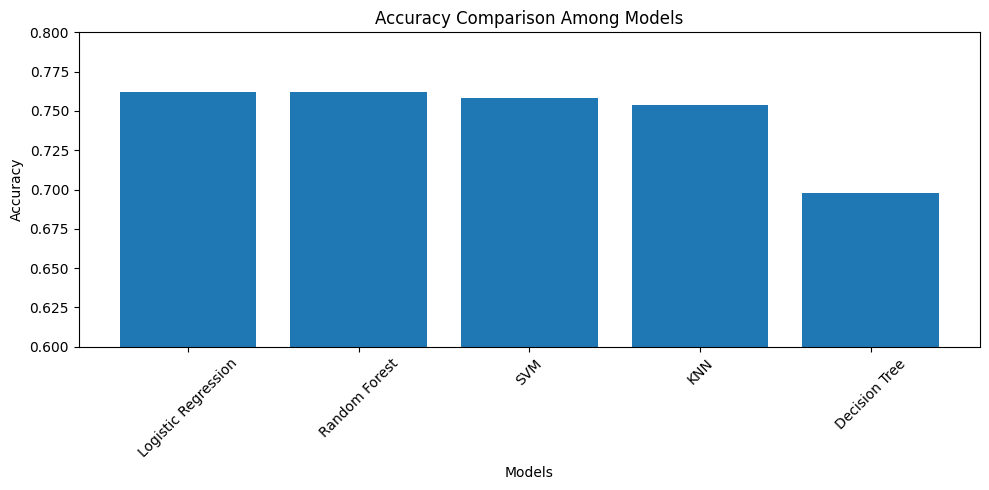

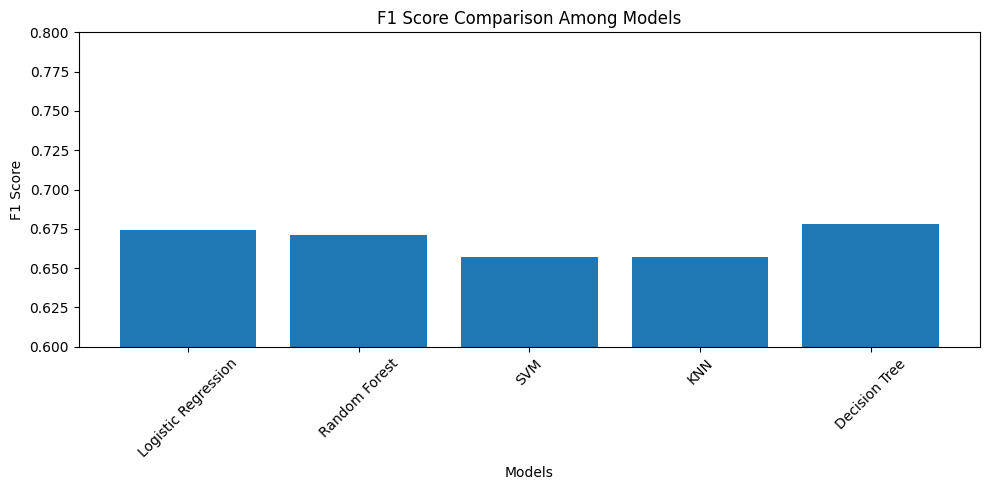

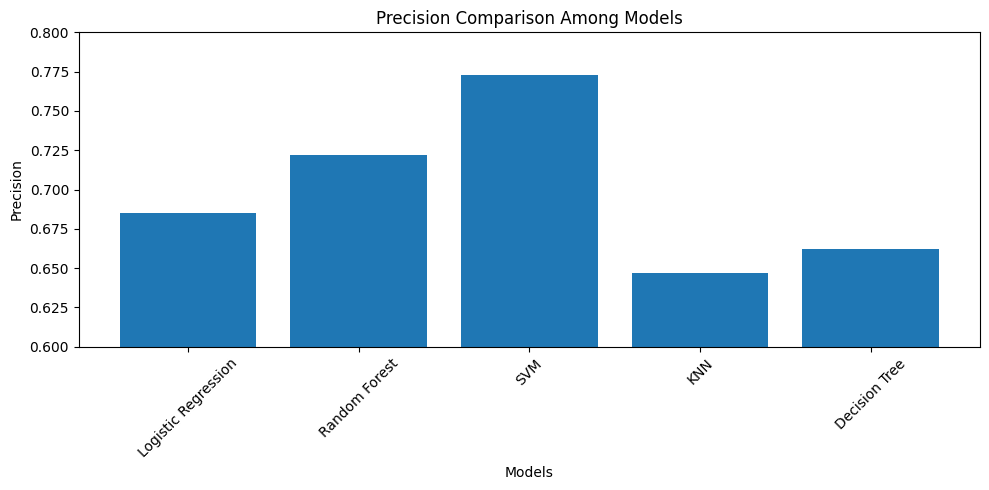

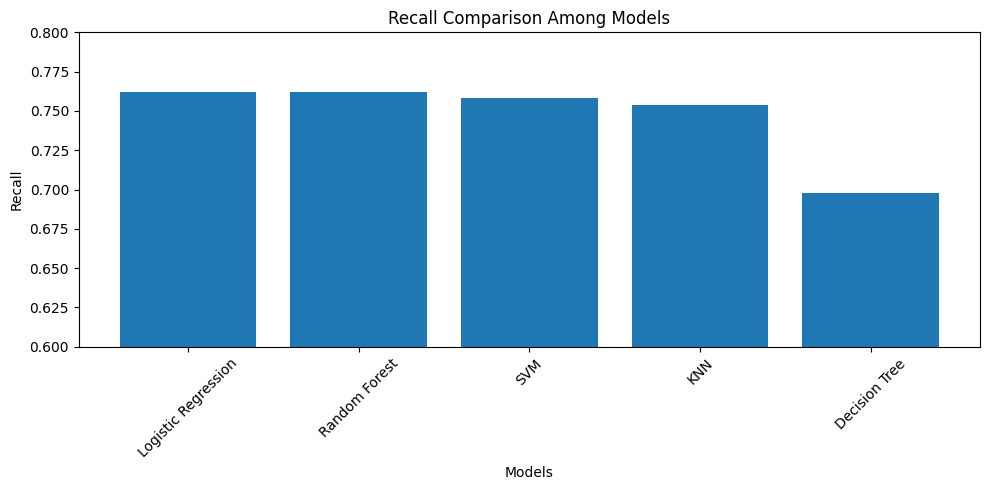

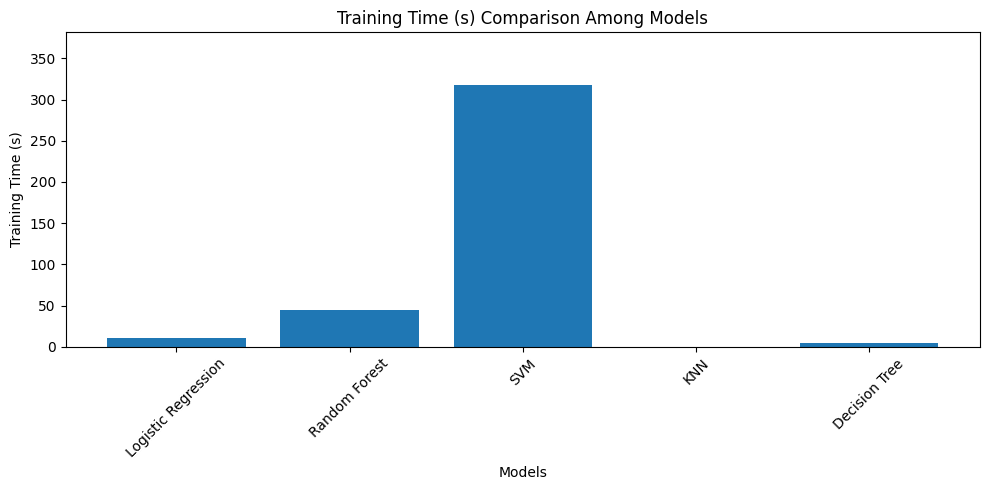

In [3]:
import matplotlib.pyplot as plt

# Define the data
metrics = ["Accuracy", "F1 Score", "Precision", "Recall", "Training Time (s)"]
logistic_regression = [0.762, 0.674, 0.685, 0.762, 10.588]
random_forest = [0.762, 0.671, 0.722, 0.762, 45.093]
svm = [0.758, 0.657, 0.773, 0.758, 318.039]
knn = [0.754, 0.657, 0.647, 0.754, 0.005]
decision_tree = [0.698, 0.678, 0.662, 0.698, 4.825]

# Plot bar graphs for each metric
for i, metric in enumerate(metrics):
    plt.figure(figsize=(10, 5))
    models = ["Logistic Regression", "Random Forest", "SVM", "KNN", "Decision Tree"]
    plt.bar(models, [logistic_regression[i], random_forest[i], svm[i], knn[i], decision_tree[i]])
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.title(f'{metric} Comparison Among Models')
    plt.xticks(rotation=45)
    
    # Adjust y-axis scale to highlight differences
    if metric != "Training Time (s)":
        plt.ylim(0.6, 0.8)  # Adjust the range based on your data
    else:
        plt.ylim(0, max(logistic_regression[i], random_forest[i], svm[i], knn[i], decision_tree[i]) * 1.2)
    
    plt.tight_layout()
    plt.show()


# **Step 13: Predictions**

In [ ]:
# Train Logistic Regression model
logistic_regressor = LogisticRegression(max_iter=1000)
logistic_regressor.fit(X_train, y_train)

# **Step 14: Important Conclusions**


1. Feature Importance: Certain features like user reputation, thumbs up count, and recipe reviews significantly influence ratings.
2. Model Performance: Logistic regression and random forest show comparable accuracies, while SVM lags slightly behind.
3. Training Time: Logistic regression requires the shortest training time, making it suitable for real-time applications.
4. Balancing Precision and Recall: SVM demonstrates higher precision but sacrifices some recall.
5. ROC AUC Score: Our models achieve respectable ROC AUC scores, indicating their effectiveness in discriminating between classes.
6. Further Analysis: There is room for further analysis and model refinement through feature exploration and hyperparameter optimization.


# **Step 15: Predictions on Test Data**

In [ ]:
# Make predictions on test data
test_preds = logistic_regressor.predict(X_test)

# **Step 16: Output Prediction**

In [ ]:
# Output predictions
sub = pd.DataFrame({'ID': range(1, len(test_df) + 1), 'Rating': test_preds})
sub.to_csv('submission.csv', index=False)

Sensitivity
Spacicity
ROC
pickle